In [4]:
from opm_thesis.read_files.cMEG2fif_bespoke import get_data_mne
from opm_thesis.preprocessing.preprocessing import Preprocessing
import pickle as pkl


In [5]:
data_dir = r"/Users/martin.iniguez/Desktop/master_thesis/data_nottingham"
acq_times = ["155445", "160513", "161344", "163001", "164054", "165308"]
raw, events, events_id = get_data_mne(data_dir, day="20230622", acq_time=acq_times[1])
preprocessing = Preprocessing(raw, events, events_id)


Loading File
Sorting Sensor Information
Creating MNE Info
Sensor Location Information
Create raw object
Creating RawArray with float64 data, n_channels=203, n_times=527760
    Range : 0 ... 527759 =      0.000 ...   439.799 secs
Ready.


KeyboardInterrupt: 

In [ ]:
epochs = preprocessing.epochs.copy()

from autoreject import AutoReject
ar = AutoReject(n_jobs=-1, verbose='tqdm')  # Use 'n_jobs=-1' to use all available CPU cores for parallel processing
ar.fit(epochs.copy().pick(['meg']))  # Fit the autoreject object to the data (only MEG channels
clean_epochs, reject_log = ar.transform(epochs.copy().pick(['meg']), return_log=True)


Running autoreject on ch_type=mag


/Users/martin.iniguez/Desktop/master_thesis/opm-thesis/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 174/174 [01:53<00:00,    1.53it/s]
100%|██████████| Computing thresholds ... : 174/174 [04:08<00:00,    1.43s/it]



























































100%|██████████| Repairing epochs : 98/98 [00:01<00:00,   71.02it/s]



































































































100%|██████████| Repairing epochs : 98/98 [00:25<00:00,    3.79it/s]






















100%|██████████| Fold : 10/10 [02:20<00:00,   14.09s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:16<00:00,    6.07it/s]










Estimated consensus=0.40 and n_interpolate=4





































































































100%|██████████| Repairing epochs : 98/98 [00:13<00:00,    7.06it/s]

Dropped 60 epochs: 0, 1, 2, 5, 6, 7, 8, 9, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 39, 41, 42, 45, 46, 47, 48, 50, 52, 53, 54, 55, 57, 61, 62, 64, 67, 69, 70, 72, 73, 74, 75, 77, 80, 82, 84, 85, 87, 88, 92, 94, 95


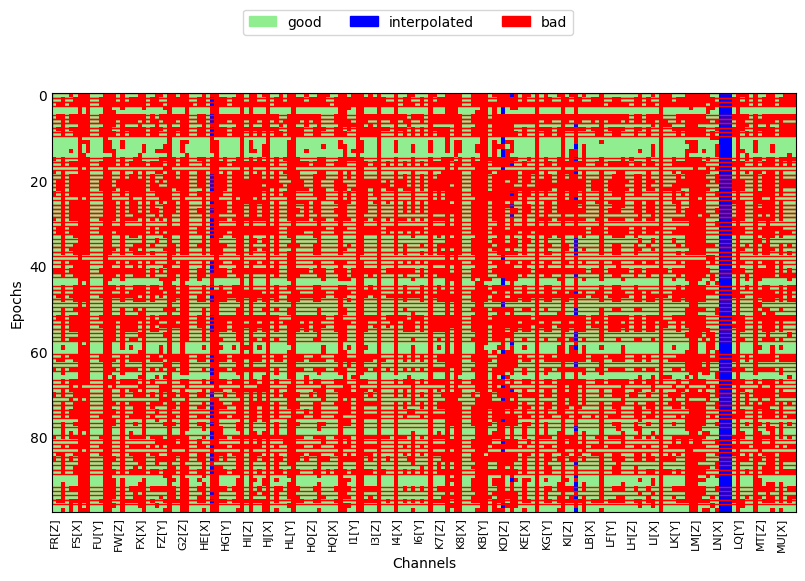

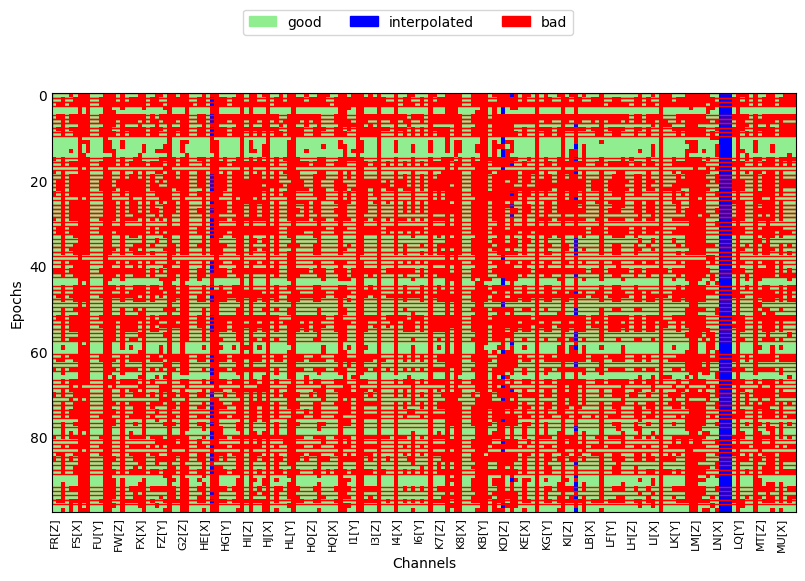

In [ ]:
reject_log.plot()


In [ ]:
raw1, events1, events_id1 = get_data_mne(data_dir, day="20230622", acq_time=acq_times[3])
preprocessing1 = Preprocessing(raw1, events1, events_id1)
epochs = preprocessing1.epochs.copy()

from autoreject import AutoReject
ar1 = AutoReject(n_jobs=-1, verbose='tqdm')  # Use 'n_jobs=-1' to use all available CPU cores for parallel processing
ar1.fit(epochs.copy().pick(['meg']))  # Fit the autoreject object to the data (only MEG channels
clean_epochs1, reject_log1 = ar1.transform(epochs.copy().pick(['meg']), return_log=True)
print(ar1)


Loading File
Sorting Sensor Information
Creating MNE Info
Sensor Location Information
Create raw object
Creating RawArray with float64 data, n_channels=203, n_times=546000
    Range : 0 ... 545999 =      0.000 ...   454.999 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 7921 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    7.4s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 3.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 330.00 Hz
- Upper transition bandwidth: 82.50 Hz (-6 dB cutoff frequency: 371.25 Hz)
- Filter length: 396001 samples (330.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   31.8s


Not setting metadata
98 matching events found
Setting baseline interval to [-2.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 98 events and 4801 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=mag


100%|██████████| Creating augmented epochs : 174/174 [02:01<00:00,    1.44it/s]
100%|██████████| Computing thresholds ... : 174/174 [1:29:12<00:00,   30.76s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:03<00:00,   24.70it/s]



































































































100%|██████████| Repairing epochs : 98/98 [3:59:47<00:00,  146.81s/it]






















100%|██████████| Fold : 10/10 [02:07<00:00,   12.77s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:11<00:00,    8.77it/s]






















100%|██████████| Fold : 10/10 [01:50<00:00,   11.01s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:09<00:00,    9.96it/s]













Estimated consensus=0.40 and n_interpolate=1





































































































100%|██████████| Repairing epochs : 98/98 [00:10<00:00,    9.68it/s]

Dropped 67 epochs: 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 40, 42, 43, 46, 47, 48, 49, 50, 51, 53, 54, 59, 60, 63, 64, 65, 66, 67, 72, 73, 74, 76, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97


AutoReject(consensus=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
      cv=10, n_interpolate=array([ 1,  4, 32]), n_jobs=-1, picks=None,
      random_state=None, thresh_method='bayesian_optimization',
      verbose='tqdm')


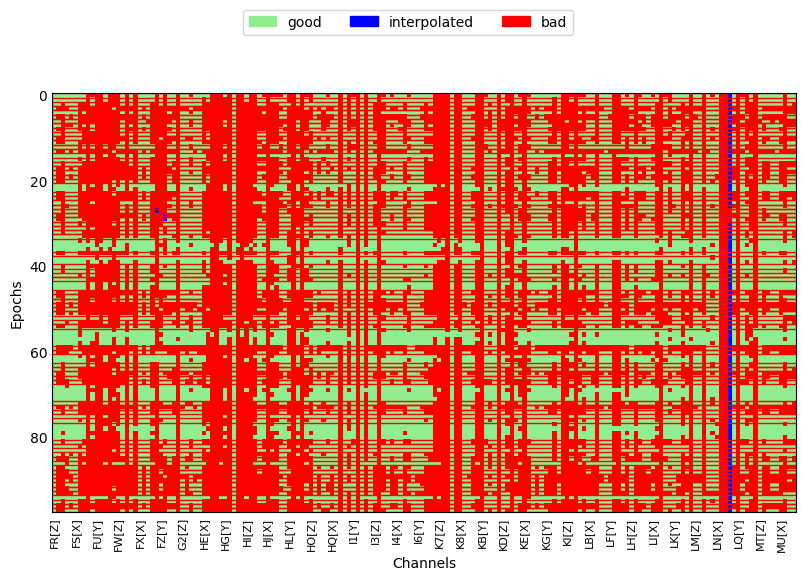

AttributeError: 'Figure' object has no attribute 'xticks'

In [ ]:
fig = reject_log1.plot()
fig.xticks()


# Resting state data

In [ ]:
data_dir = r"/Users/martin.iniguez/Desktop/master_thesis/data_nottingham"
acq_times = ["155445", "160513", "161344", "163001", "164054", "165308"]
raw, events, events_id = get_data_mne(data_dir, day="20230622", acq_time=acq_times[4])
preprocessing = Preprocessing(raw, events, events_id)

path = "/Users/martin.iniguez/Desktop/master_thesis/opm-thesis/data/data_nottingham_preprocessed/resting_164054.pkl"
with open(path, "wb") as f:
    pkl.dump(preprocessing, f)


Loading File
Sorting Sensor Information
Creating MNE Info
Sensor Location Information
Create raw object
Creating RawArray with float64 data, n_channels=203, n_times=108120
    Range : 0 ... 108119 =      0.000 ...    90.099 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 7921 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.9s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 3.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 330.00 Hz
- Upper transition bandwidth: 82.50 Hz (-6 dB cutoff frequency: 371.25 Hz)
- Filter length: 396001 samples (330.001 s)



/Users/martin.iniguez/Desktop/master_thesis/opm-thesis/opm_thesis/preprocessing/preprocessing.py:85: RuntimeWarning: filter_length (396001) is longer than the signal (108120), distortion is likely. Reduce filter length or filter a longer signal.
  return raw.copy().filter(**default_params)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    6.9s


Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 46 events and 2401 original time points ...
1 bad epochs dropped


In [2]:
import pickle
DATA_DIR = (
    r"/Users/martin.iniguez/Desktop/master_thesis/"
    r"opm-thesis/data/data_nottingham_preprocessed"
)

RESTING_PATH = DATA_DIR + "/resting_epochs.pkl"
with open(RESTING_PATH, "rb") as f:
    resting_epochs = pickle.load(f)
resting_epochs_freq = resting_epochs["alpha"]
resting_epochs_freq.info
info_resting = resting_epochs_freq.info

ref_channels =[]
for ch in info_resting['chs']:
    if ch["kind"] == 301:
      ref_channels.append(ch["ch_name"])


In [3]:
"""This script is used to classify the data using CSP and Logistic Regression.

This classifier takes the epochs from the different frequency bands and
acquisition times and trains a binary CSP classifier for each possible pair of
ids. Then, it predicts the label of each epoch using each classifier and gives the
results of the pairs.
"""
import pickle
import mne
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP
from matplotlib import pyplot as plt

from opm_thesis.preprocessing.utils import (
    get_closest_sensors,
)

alpha = dict({"l_freq": 8, "h_freq": 12})
beta = dict({"l_freq": 12, "h_freq": 30})
low_gamma = dict({"l_freq": 30, "h_freq": 60})
high_gamma = dict({"l_freq": 60, "h_freq": 120})

frequencies = {
    "alpha": alpha,
    "beta": beta,
    "low_gamma": low_gamma,
    "high_gamma": high_gamma,
}

DATA_DIR = (
    r"/Users/martin.iniguez/Desktop/master_thesis/"
    r"opm-thesis/data/data_nottingham_preprocessed"
)

# Define possible pairs for classification
ids = [2**i for i in range(3, 8)]

EPOCHS_PATH = DATA_DIR + "/all_epochs_filtered.pkl"
with open(EPOCHS_PATH, "rb") as f:
    epochs = pickle.load(f)

RESTING_PATH = DATA_DIR + "/resting_epochs.pkl"
with open(RESTING_PATH, "rb") as f:
    resting_epochs = pickle.load(f)

total_scores = {}
USE_HALF = True
USE_X = False
USE_REF = True

key = "alpha"
epochs_freq = epochs[key]
resting_epochs_freq = resting_epochs[key]

indices = np.where(
    epochs_freq.events[:, -1] == 16,
)[0]

all_epochs = epochs_freq[indices]
picks = mne.pick_types(all_epochs.info, meg=True, exclude="bads")
id_epochs = all_epochs.copy().pick(picks)
resting_epochs = resting_epochs_freq.copy().pick(picks)

if USE_X:
  # selected_chs = [ch for ch in id_epochs.ch_names if '[X]' in ch]
  selected_chs = [ch for ch in get_closest_sensors(id_epochs.info, "LQ[X]",27) if '[X]' in ch]
  id_epochs = id_epochs.copy().pick(selected_chs)
  resting_epochs = resting_epochs.copy().pick(selected_chs)

if USE_REF:
  selected_chs = [ch for ch in ref_channels if '[Y]' in ch]

  id_epochs = all_epochs.copy().pick(ref_channels)
  resting_epochs = resting_epochs_freq.copy().pick(ref_channels)

data_id = id_epochs.get_data()
data_resting = resting_epochs.get_data()

# Using the inner half of the epochs (the second and third quarter) (1s)
if USE_HALF:
    quarter = data_id.shape[-1] // 4
    data_id = data_id[:, :, quarter:]
    data_id = data_id[:, :, :-quarter]

data_epochs = np.concatenate((data_resting, data_id), axis=0)
labels = np.concatenate(
    (
        np.ones(data_resting.shape[0]).astype(int),
        np.zeros(data_id.shape[0]).astype(int),
    )
)

# Building classifier
clf = LinearDiscriminantAnalysis()

# Split data into training and test sets once
train_idx, test_idx = train_test_split(
    np.arange(data_epochs.shape[0]),  # indices to split
    test_size=0.2,  # 20% test size
    random_state=50,  # seed for reproducibility
    stratify=labels  # preserve label balance
)

# Use the indices to select the train/test data
X_train, y_train = data_epochs[train_idx], labels[train_idx]
X_test, y_test = data_epochs[test_idx], labels[test_idx]

# Fit CSP on training data
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False).fit(X_train, y_train)

# Transform training and test data
X_train_csp = csp.transform(X_train)
X_test_csp = csp.transform(X_test)

# Train and evaluate classifier
clf.fit(X_train_csp, y_train)
score = clf.score(X_test_csp, y_test)

print(f'Score: {score:.2f}')

if not USE_REF:
  csp.plot_patterns(id_epochs.info, ch_type="mag", units="Patterns (AU)", size=1.5)
  plt.show()


Computing rank from data with rank=None
    Using tolerance 6.8e-13 (2.2e-16 eps * 21 dim * 1.5e+02  max singular value)
    Estimated rank (mag): 21
    MAG: rank 21 computed from 21 data channels with 0 projectors
Reducing data rank from 21 -> 21
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-13 (2.2e-16 eps * 21 dim * 1.1e+02  max singular value)
    Estimated rank (mag): 21
    MAG: rank 21 computed from 21 data channels with 0 projectors
Reducing data rank from 21 -> 21
Estimating covariance using EMPIRICAL
Done.
Score: 0.96


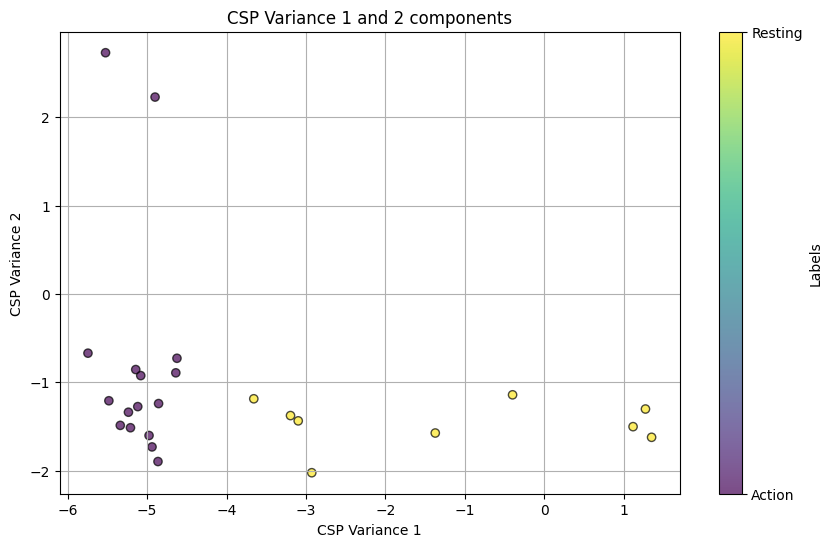

In [5]:
import matplotlib.pyplot as plt

# Extracting CSP variances for channel 1 and 2 for each trial (training data)
variances_train_ch1 = X_test_csp[:, 0]
variances_train_ch2 = X_test_csp[:, 1]

plt.figure(figsize=(10, 6))

# Creating a scatter plot with different colors for different labels
scatter = plt.scatter(variances_train_ch1, variances_train_ch2, c=y_test, cmap='viridis', edgecolor='k', alpha=0.7)

# Adding a color bar to understand which color corresponds to which label
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.set_label('Labels')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Action', 'Resting'])

plt.xlabel('CSP Variance 1')
plt.ylabel('CSP Variance 2')
plt.title('CSP Variance 1 and 2 components')
plt.grid(True)
plt.show()
